In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
data=pd.read_csv("Mall_Customers.csv")

In [5]:
data.shape

(200, 5)

In [6]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data=data.drop(['CustomerID'],axis=1)

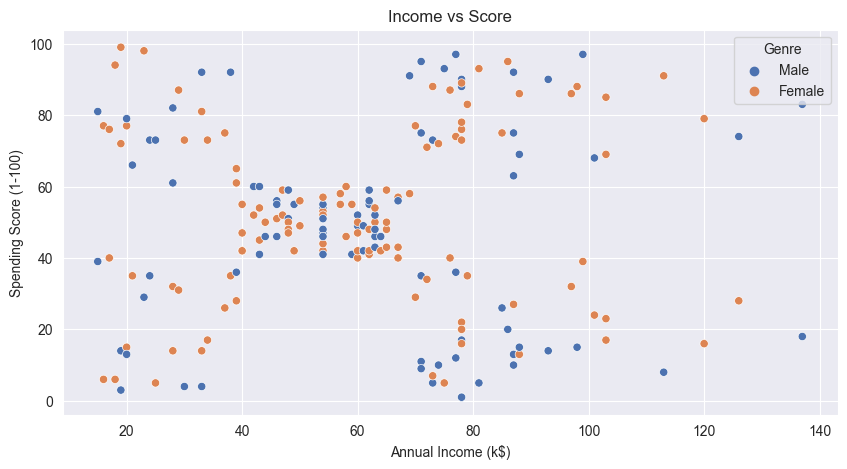

In [10]:
sb.set({"figure.figsize":(10,5)})
sb.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue="Genre")
plt.title('Income vs Score')
plt.show()

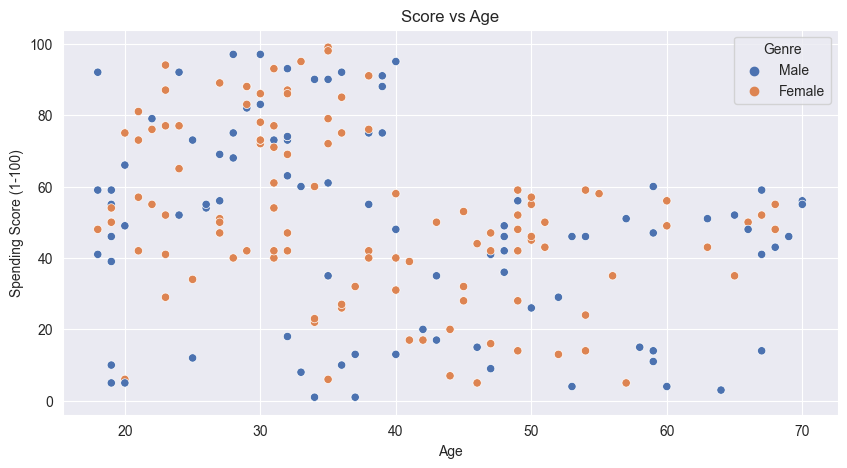

In [11]:
sb.scatterplot(data=data,x='Age',y='Spending Score (1-100)',hue="Genre")
plt.title('Score vs Age')
plt.show()

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [13]:
data['Genre']= label_encoder.fit_transform(data['Genre'])

In [14]:
data['Genre'].unique()

array([1, 0])

In [15]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
from sklearn.cluster import KMeans
cluster=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k).fit(data)
    cluster.append(kmean.inertia_)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

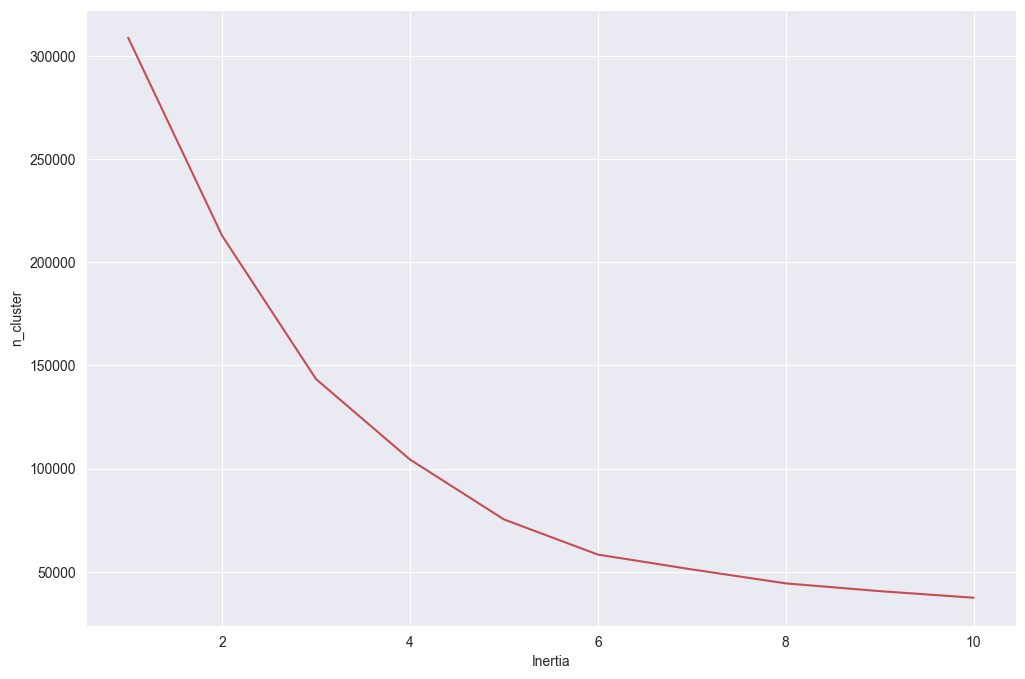

In [17]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),cluster,'r-')
plt.xlabel('Inertia')
plt.ylabel('n_cluster')
plt.show()

In [18]:
km=KMeans(n_clusters=5).fit(data)
data['Labels']=km.labels_

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
centroids=km.cluster_centers_
centroids

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025]])

C:\Users\HP\AppData\Local\Temp\ipykernel_22296\2389753024.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],


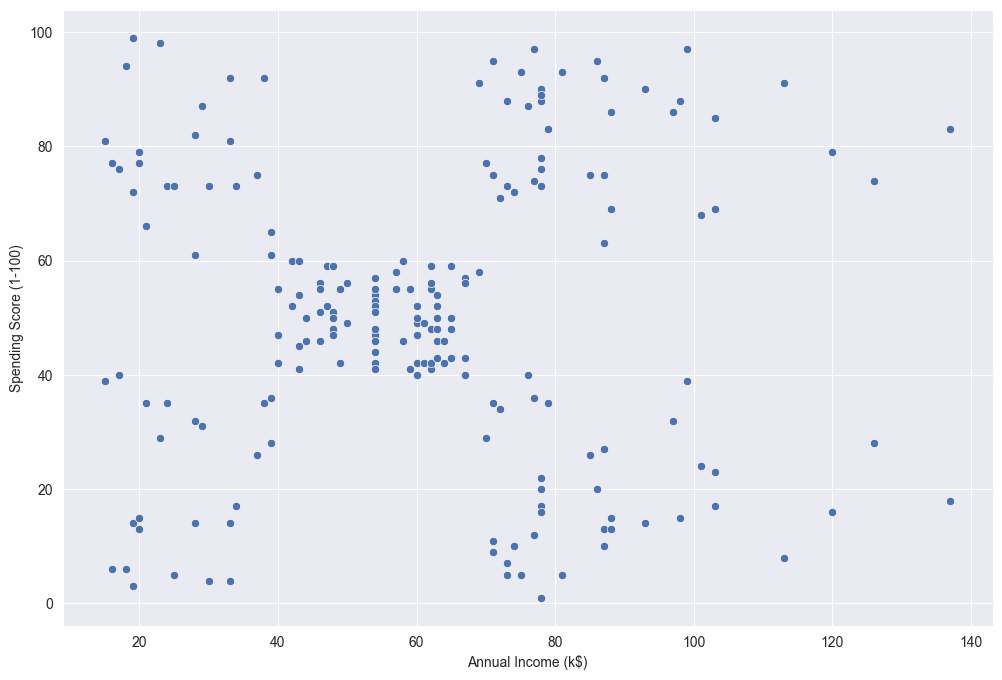

In [20]:
plt.figure(figsize=(12,8))
sb.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'], 
palette=sb.color_palette('hls', 5))
plt.show()

In [21]:
from sklearn import metrics
score=metrics.silhouette_score(data,km.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(score))

Silhouette_Score Coefficient : 0.44
